### Which film features are important for the revenue? When a film can be considered a financial success?

According to the experts a film can be considered a financial success if the revenue is at least twice as high as the budget: 
https://io9.gizmodo.com/5747305/how-much-money-does-a-movie-need-to-make-to-be-profitable

The below analysis aims to predict the financial success or failure of a film and to show which film features are important for the prediction of this result. The data used for the prediction combines two data sets from Kaggle and data.world


In [2]:
import numpy as np
import pandas as pd

In [10]:
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import  metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler, Normalizer, MaxAbsScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report
np.warnings.filterwarnings('ignore')

__Comparing the available data sets and variables:__

In [6]:
data=pd.read_csv('data_world_movie_metadata_with _ratings.csv')
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
data.shape

(5043, 28)

In [11]:
data1=pd.read_csv('kaggle_movies_metadata.csv')
data1.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [12]:
data1.shape

(45466, 24)

In [13]:
print(data.columns)
print(data1.columns)

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')
Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


__The two data frames have to be merged in order to get sufficient number of features for the analysis:__

In [17]:
data1['year']=data1['release_date'].str[:4]
data1['year']=pd.to_numeric(data1['year'])

In [18]:
data2=pd.merge(data,data1,how='left',left_on=('movie_title','title_year'), right_on=('title','year'))

__The merged data frame was cleaned in order to remove redundant and not informative variables and to get it ready for model preprocessing:__

In [37]:
data=pd.read_csv('allFilms1.csv')
data=data.drop('Unnamed: 0',axis=1)
data=data.reset_index(drop=True)
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres_x,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009.0,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Avatar,False,7.2,12114.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2007.0,9.610000e+08,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Pirates of the Caribbean: At World's End,False,6.9,4627.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015.0,8.806746e+08,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,Spectre,False,6.3,4552.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012.0,1.084939e+09,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Dark Knight Rises,False,7.6,9263.0
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012.0,2.841391e+08,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,John Carter,False,6.1,2170.0


In [32]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres_x', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget_x', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'movie_facebook_likes', 'adult', 'budget_y', 'genres_y',
       'id', 'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

__Example of data for one film:__

In [24]:
data.loc[103]

color                                                                    Color
director_name                                                       James Gunn
num_critic_for_reviews                                                     653
duration                                                                   121
director_facebook_likes                                                    571
actor_3_facebook_likes                                                    3000
actor_2_name                                                        Vin Diesel
actor_1_facebook_likes                                                   14000
gross                                                              3.33131e+08
genres_x                                               Action|Adventure|Sci-Fi
actor_1_name                                                    Bradley Cooper
movie_title                                            Guardians of the Galaxy
num_voted_users                                     

__Data frame contains all types of variables that have to be either cleaned, removed, changed to numeric or one-hot-encoded for the model:__

In [38]:
#adding a column with production companies count
import ast
data['production_companies'] = data['production_companies'].fillna('[]').apply(ast.literal_eval)
data['production_companies'] = data['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else[])

In [39]:
data['production_companies_nb']=data.production_companies.apply(lambda x: len(x))

In [40]:
data.production_companies.loc[102]

['Columbia Pictures',
 'Intermedia Films',
 'Warner Bros.',
 'C-2 Pictures',
 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG',
 'Mostow/Lieberman Productions']

In [47]:
data=pd.read_csv('allFilms3.csv')
data=data.drop('Unnamed: 0',axis=1)
data=data.reset_index(drop=True)


In [48]:
data.production_companies[102]

"['Columbia Pictures', 'Intermedia Films', 'Warner Bros.', 'C-2 Pictures', 'IMF Internationale Medien und Film GmbH & Co. 3. Produktions KG', 'Mostow/Lieberman Productions']"

In [49]:
#production companies are not listed alphabetically, so we can assume that the first one is the most important one\
#and will be taken for the analysis
data.production_companies=data.production_companies.str.split(',').str[0]
data.production_companies=data.production_companies.str.replace('\'','')
data.production_companies=data.production_companies.str.replace('\[','')
data.production_companies=data.production_companies.str.replace('\]','')

In [50]:
data.production_companies[102]

'Columbia Pictures'

In [52]:
#if the production company is listed for less than 20 films it will be marked as Other in order to simplify the one hot encoding
counts2=data.production_companies.value_counts()
data.production_companies[data.production_companies.isin(counts2[counts2<20].index)]='Other'

In [53]:
#if the language is listed for less than 10 films it will be marked as Other in order to simplify the one hot encoding
counts3=data.language.value_counts()
data.language[data.language.isin(counts3[counts3<10].index)]='Other'

In [54]:
#if the country is listed for less than 10 films it will be marked as Other in order to simplify the one hot encoding
counts4=data.country.value_counts()
data.country[data.country.isin(counts4[counts4<10].index)]='Other'

In [55]:
#unnecessary variables were removed in separate file to give the final file for preprocessing

In [56]:
data=pd.read_csv('allFilms5.csv')
data=data.drop('Unnamed: 0',axis=1)
data=data.reset_index(drop=True)
data.head()

,color,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres_x,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,...,imdb_score,movie_facebook_likes,budget_y,popularity,production_companies,revenue,runtime,vote_average,vote_count,production_companies_nb
0,Color,723.0,0.0,855.0,1000.0,Sci-Fi|Fantasy,886204,4834,0.0,3054.0,...,7.9,33000,237000000,185.070892,Ingenious Film Partners,2.787965e+09,162.0,7.2,12114.0,4
1,Color,302.0,563.0,1000.0,40000.0,Action|Adventure|Western,471220,48350,0.0,1238.0,...,7.1,0,300000000,31.363664,Walt Disney Pictures,9.610000e+08,169.0,6.9,4627.0,3
2,Color,602.0,0.0,161.0,11000.0,Action|Adventure|Western,275868,11700,1.0,994.0,...,6.8,85000,245000000,24.926577,Columbia Pictures,8.806746e+08,148.0,6.3,4552.0,3
3,Color,813.0,22000.0,23000.0,27000.0,Crime|Drama|Thriller,1144337,106759,0.0,2701.0,...,8.5,164000,250000000,20.582580,Other,1.084939e+09,165.0,7.6,9263.0,4
4,Color,462.0,475.0,530.0,640.0,Sci-Fi|Fantasy,212204,1873,1.0,738.0,...,6.6,24000,260000000,14.670353,Walt Disney Pictures,2.841391e+08,132.0,6.1,2170.0,1


In [57]:
data.columns

Index(['color', 'num_critic_for_reviews', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'genres_x',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes',
       'budget_y', 'popularity', 'production_companies', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'production_companies_nb'],
      dtype='object')

In [58]:
data.loc[102]

color                                    Color
num_critic_for_reviews                     280
director_facebook_likes                     84
actor_3_facebook_likes                     191
actor_1_facebook_likes                     648
genres_x                        Sci-Fi|Fantasy
num_voted_users                         305340
cast_total_facebook_likes                 1769
facenumber_in_poster                         0
num_user_for_reviews                      1676
language                               English
country                                    USA
content_rating                               R
actor_2_facebook_likes                     284
imdb_score                                 6.4
movie_facebook_likes                         0
budget_y                             200000000
popularity                             20.8189
production_companies         Columbia Pictures
revenue                               4.35e+08
runtime                                    109
vote_average 

__Adding the 'result' column:__

In [59]:
data['result']=data.revenue/data.budget_y

__Adding the'target' column (1 for films that brought at least twice as much revenue as the budget spent and 0 for others):__

In [60]:
data.loc[data['result'] >=2, 'target'] = 1
data.loc[data['result'] <2, 'target'] = 0

__One hot encoding of the non-numerical variables using the get dummies method:__

In [61]:
data1=pd.get_dummies(data[data.columns])

In [63]:
data1.head()

,num_critic_for_reviews,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,actor_2_facebook_likes,imdb_score,...,production_companies_Summit Entertainment,production_companies_The Weinstein Company,production_companies_Touchstone Pictures,production_companies_TriStar Pictures,production_companies_Twentieth Century Fox Film Corporation,production_companies_United Artists,production_companies_Universal Pictures,production_companies_Village Roadshow Pictures,production_companies_Walt Disney Pictures,production_companies_Warner Bros.
0,723.0,0.0,855.0,1000.0,886204,4834,0.0,3054.0,936.0,7.9,...,0,0,0,0,0,0,0,0,0,0
1,302.0,563.0,1000.0,40000.0,471220,48350,0.0,1238.0,5000.0,7.1,...,0,0,0,0,0,0,0,0,1,0
2,602.0,0.0,161.0,11000.0,275868,11700,1.0,994.0,393.0,6.8,...,0,0,0,0,0,0,0,0,0,0
3,813.0,22000.0,23000.0,27000.0,1144337,106759,0.0,2701.0,23000.0,8.5,...,0,0,0,0,0,0,0,0,0,0
4,462.0,475.0,530.0,640.0,212204,1873,1.0,738.0,632.0,6.6,...,0,0,0,0,0,0,0,0,1,0


__Checking which variables are the most correlated in order to remove them to simplify the model and avoid the redundant information:__

In [64]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
def get_top_correlations(df, n=5):
    au_corr = df.corr().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]
print("Top Correlations")
print(get_top_correlations(data1, 95))

Top Correlations
actor_1_facebook_likes         cast_total_facebook_likes            0.949054
language_Hindi                 country_India                        0.923318
num_voted_users                vote_count                           0.885574
imdb_score                     vote_average                         0.859250
num_voted_users                num_user_for_reviews                 0.793177
language_Mandarin              country_China                        0.790539
revenue                        vote_count                           0.781684
language_Japanese              country_Japan                        0.769453
budget_y                       revenue                              0.732961
num_critic_for_reviews         vote_count                           0.705486
num_user_for_reviews           vote_count                           0.698772
num_critic_for_reviews         movie_facebook_likes                 0.689670
movie_facebook_likes           vote_count                  

In [65]:
#some variables are correlated at the level of almost 1 and other can be considered as information leak as "vote_count",
#so have to be removed

In [67]:
data1=data1.drop(['cast_total_facebook_likes','language_Hindi','vote_count','vote_average','num_user_for_reviews','language_Mandarin',\
                 'language_Japanese','revenue'],1)

In [68]:
data1=data1.drop(['num_voted_users','popularity','num_critic_for_reviews','imdb_score'],1)

In [69]:
data1=data1.drop(['result'],1)

In [78]:
data1=data1[data1.target.notnull()]

In [70]:
data1.columns #all the variables that are left are purely related to the film and cannot be considered as information leak

Index(['director_facebook_likes', 'actor_3_facebook_likes',
       'actor_1_facebook_likes', 'facenumber_in_poster',
       'actor_2_facebook_likes', 'movie_facebook_likes', 'budget_y', 'runtime',
       'production_companies_nb', 'target', 'color_ Black and White',
       'color_Color', 'genres_x_Action|Adventure|Western',
       'genres_x_Biography', 'genres_x_Children|Animation', 'genres_x_Comedy',
       'genres_x_Comedy|Drama', 'genres_x_Comedy|Romance',
       'genres_x_Crime|Drama|Thriller', 'genres_x_Crime|Thriller',
       'genres_x_Documentary', 'genres_x_Drama', 'genres_x_Drama|Romance',
       'genres_x_Horror', 'genres_x_Music', 'genres_x_Sci-Fi|Fantasy',
       'genres_x_Sport', 'genres_x_War', 'language_English', 'language_French',
       'language_German', 'language_Other', 'language_Spanish',
       'country_Australia', 'country_Canada', 'country_China',
       'country_France', 'country_Germany', 'country_Hong Kong',
       'country_India', 'country_Ireland', 'country

__Predicting the film success and evaluating feature importances with the Random Forest classifier:__

In [79]:
X=data1.drop(['target'],1)
y=data1.target

In [80]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=123)

In [74]:
data1.describe()#numeric data needs to be standardized for the model

,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,facenumber_in_poster,actor_2_facebook_likes,movie_facebook_likes,budget_y,runtime,production_companies_nb,target,...,production_companies_Summit Entertainment,production_companies_The Weinstein Company,production_companies_Touchstone Pictures,production_companies_TriStar Pictures,production_companies_Twentieth Century Fox Film Corporation,production_companies_United Artists,production_companies_Universal Pictures,production_companies_Village Roadshow Pictures,production_companies_Walt Disney Pictures,production_companies_Warner Bros.
count,4458.000000,4458.000000,4458.000000,4458.000000,4458.000000,4458.000000,4.458000e+03,4458.000000,4458.000000,3790.000000,...,4458.000000,4458.000000,4458.000000,4458.000000,4458.000000,4458.000000,4458.000000,4458.000000,4458.000000,4458.000000
mean,739.562808,682.523777,7014.834679,1.356214,1780.104980,8107.459847,3.179632e+07,108.188201,2.973306,0.515567,...,0.010319,0.007402,0.007851,0.009197,0.040825,0.015029,0.057873,0.016375,0.026245,0.015478
std,2918.592004,1731.966294,15274.050607,1.924438,4224.517954,20141.435411,4.246392e+07,20.751827,2.189263,0.499824,...,0.101066,0.085728,0.088268,0.095469,0.197908,0.121682,0.233530,0.126927,0.159881,0.123457
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,151.000000,658.000000,0.000000,318.250000,0.000000,2.000000e+06,95.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,394.000000,1000.000000,1.000000,630.000000,207.500000,1.650000e+07,105.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,214.000000,653.000000,12000.000000,2.000000,941.000000,7000.000000,4.200000e+07,118.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,23000.000000,23000.000000,640000.000000,31.000000,137000.000000,349000.000000,3.800000e+08,254.000000,26.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
pipe=Pipeline([("scaler", StandardScaler()),
               ("forest", RandomForestClassifier())])
               
param_grid={"forest__n_estimators":[1000,2000,3000],
            "forest__max_depth":[700,900,1100]}

gs=GridSearchCV(pipe, param_grid,scoring='accuracy', cv=5, n_jobs=6)
gs.fit(X_train,y_train)

print(gs.best_params_)
print(gs.best_score_)
print(accuracy_score(gs.best_estimator_.predict(X_test),y_test))

{'forest__max_depth': 700, 'forest__n_estimators': 1000}
0.7139087825103656
0.7150395778364116


In [83]:
forest=RandomForestClassifier(n_estimators=1000, max_depth=700,random_state=0,n_jobs=6)
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=700, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=6,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [95]:
importances=forest.feature_importances_
indices=np.argsort(importances)[::-1]
feat_labels=data1.drop(['target'],1).columns
for f in range(X_train.shape[1]):
    print("%2d)%-*s%f"%(f+1,30,feat_labels[indices[f]],importances[indices[f]]))

 1)budget_y                      0.115526
 2)movie_facebook_likes          0.100008
 3)director_facebook_likes       0.083867
 4)actor_3_facebook_likes        0.081110
 5)runtime                       0.080077
 6)actor_2_facebook_likes        0.077765
 7)actor_1_facebook_likes        0.074333
 8)production_companies_nb       0.049211
 9)facenumber_in_poster          0.039861
10)production_companies_Other    0.020883
11)content_rating_R              0.012928
12)genres_x_Crime|Drama|Thriller 0.012392
13)content_rating_PG-13          0.012296
14)country_USA                   0.011183
15)genres_x_Sci-Fi|Fantasy       0.010707
16)genres_x_Action|Adventure|Western0.009534
17)content_rating_PG             0.008980
18)genres_x_Horror               0.008514
19)genres_x_Comedy|Romance       0.007807
20)production_companies_Universal Pictures0.007764
21)country_UK                    0.007202
22)production_companies_Twentieth Century Fox Film Corporation0.006719
23)production_companies_Paramount P

__The most important features for the Random Forest model include:budget, movie_facebook_likes, director_facebook_likes, actor_3_facebook_likes,runtime, actor_2_facebook_likes,actor_1_facebook_likes, production_companies_nb,facenumber_in_poster, content_rating_R, genres_x_Crime|Drama|Thriller, content_rating_PG-13,country_USA, genres_x_Sci-Fi|Fantasy, genres_x_Action|Adventure|Western,content_rating_PG, genres_x_Horror,genres_x_Comedy|Romance,production_companies_Universal Pictures,country_UK.__

--the fact that the number of Facebook likes for the 3rd role actor is more important than for 1st and 2nd actor may suggest that the films with more than 2 popular actors have better chance for financial success

--production companies: Universal Pictures was most important for the model ('Other' category was higher just because of the number of the movies)

--content ratings most important for the model: R,PG-13 and PG suggest some scenes requiring parental guidance

--genres:Crime|Drama|Thriller,Sci-Fi|Fantasy,Action|Adventure|Western and Horror were most important for the model

--production countries: USA and UK were the most important for the model



__Comparing the Random Forest results with XGBClassifier:__

In [97]:
pipe=Pipeline([("scaler", MinMaxScaler()),
               ("xgb", XGBClassifier())])
               
param_grid={"xgb__n_estimators":[500,1000]
            }

gs=GridSearchCV(pipe, param_grid,scoring='accuracy', cv=5, n_jobs=6)
gs.fit(X_train,y_train)

print(gs.best_params_)
print(gs.best_score_)
print(accuracy_score(gs.best_estimator_.predict(X_test),y_test))

{'xgb__n_estimators': 500}
0.7029777610252544
0.6992084432717678


In [98]:
from xgboost import plot_importance
from matplotlib import pyplot as plt

In [101]:
xgbc = XGBClassifier(n_estimators=500,n_jobs=6)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=6, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

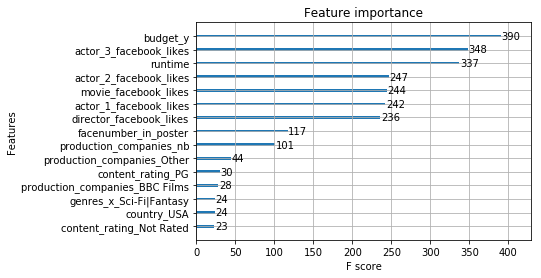

In [102]:
plot_importance(booster=xgbc, max_num_features=15, importance_type='weight')

In [ ]:
#XGBClssifier shows similar results to Random Forest focused mainly on importance of budget and actors and director popularity